# Visualizing intermediate activations

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [14]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')       # 4(vgg16) is giving warning that optimizer is not loading,    1 and 2 will give error when tensorflow.keras is not imported.
model.summary()                                   # 2 has dropout but 1 doesn't have

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [21]:
#Listing 5.25 - Preprocessing a single image
from keras.preprocessing import image
import numpy as np

img_path = 'cat.1700.jpg'
img = image.load_img(img_path, target_size = (150,150))
print(img)

img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

print(img_tensor.shape)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F5524E5F748>
(150, 150, 3)
(1, 150, 150, 3)


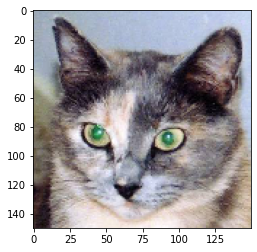

'plt.imshow(img_tensor[0,:,:,0])\nplt.show()\nplt.imshow(img_tensor[0,:,:,1])\nplt.show()\nplt.imshow(img_tensor[0,:,:,2])  # why 0?\nplt.show()'

In [83]:
#Listing 5.26 - Displaying the test picture
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
"""plt.imshow(img_tensor[0,:,:,0])
plt.show()
plt.imshow(img_tensor[0,:,:,1])
plt.show()
plt.imshow(img_tensor[0,:,:,2])  # why 0?
plt.show()"""

In [0]:
# Listing 5.27 - Instantiating a model from an input tensor and a list of output tensors
# To do this, we’ll use the Keras class 'Model'

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

# When fed an image input, this model returns the values of the layer activations in the original model

In [0]:
#rough
z = model.layers[:8]
for i in range(8):
  print(z[i].name)

In [0]:
#Listing 5.28 - Running the model in predict mode
activations = activation_model.predict(img_tensor)

In [100]:
# rough
print('length of activations= ' + str(len(activations)))

for i in range(8):
  print(activations[i].shape)

# print(type(activations[0])); type(activations)
#  activations is a list, whereas its elements are numpy arrays

length of activations= 8
(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


In [101]:
activations[0].shape

(1, 148, 148, 32)

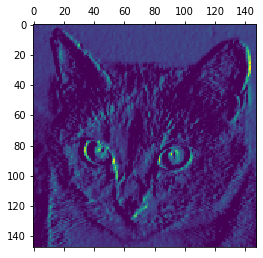

In [121]:
# Listing 5.29 - Visualizing the fourth channel (out of 32) of first layer activation
first_layer_activation=activations[0]
plt.matshow(first_layer_activation[0,:,:,4], cmap = 'viridis')

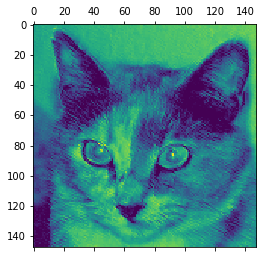

In [117]:
plt.matshow(first_layer_activation[0,:,:,7], cmap = 'viridis')

In [0]:
# Above two visualizations are varying from the book which is diagonal edge detector and bright green dot detector

In [120]:
# Listing 5.31 - Visualizing every channel in every intermediate activation
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size : (col+1) * size, row * size : (row+1)*size] = channel_image

  scale = 1./size
  plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

Output hidden; open in https://colab.research.google.com to view.